In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import main
from Graph import Graph
from Node import Node
from Edge import Edge
import plot_graph

In [2]:
input_directory = r"C:\I24 Motion Project\Anomaly Detection\csv\TM_1000_GT.csv"
df = main.read_full_data(input_directory, 0)

In [3]:
MyGraph = Graph()

one_frame_df = df.loc[(df['Frame #'] == 70)].sort_values('x').reset_index()
one_frame_matrix = np.array(one_frame_df)
print(one_frame_df)

# Add all the nodes
for one_row in one_frame_matrix :
    ID, x_pos, y_pos = one_row[2], one_row[3], one_row[4]
    car_node = Node(ID,x_pos,y_pos,0)
    MyGraph.add_node(car_node)
    
# Add all the edges thru sliding window approach
# def add_edges(one_frame_df, MyGraph) :

i = 0

while(len(one_frame_df) != 0) :
    # 1. Prepare ego car node to create edges with.
    ego_car_node = Node(one_frame_df.at[i, 'ID'], 
                        one_frame_df.at[i, 'x'], 
                        one_frame_df.at[i, 'y'], 
                        0)
    window_start = one_frame_df.at[i, 'x']                              # 2. Get x position of left-most car
    window_df = one_frame_df.loc[one_frame_df['x'] < window_start + 40] # 3. Select all cars within window
    # 4. Translate all cars in window as edges and add to graph.
    window_ar = np.array(window_df)
    
    for car in window_ar :
        ID, x_pos, y_pos = car[2], car[3], car[4]
        car_node = Node(ID, x_pos, y_pos, 0)
        edge1, edge2 = Edge(ego_car_node, car_node), Edge(car_node, ego_car_node)
        MyGraph.add_edge(edge1)
        MyGraph.add_edge(edge2)
    
    # 5. Drop the very first row.
    one_frame_df.drop(index=i,inplace=True)
    i += 1

   index  Frame #   ID            x          y      speed  acceleration
0    240       70  1.0  2315.426725   5.486132  29.061262 -3.623768e-12
1    241       70  2.0  2323.694808   9.143554  30.622778  3.047851e-03
2    243       70  4.0  2339.547059  12.800975  35.077720  2.743066e-02
3    242       70  3.0  2341.546353   1.828711  31.325815  0.000000e+00
4    244       70  5.0  2365.705080   9.143554  30.695520 -3.474550e-02
5    245       70  6.0  2375.771868   5.486132  30.703038  1.149040e+00


[<Edge.Edge object at 0x000001F3C758A310>, <Edge.Edge object at 0x000001F3C41045B0>, <Edge.Edge object at 0x000001F3C758A640>, <Edge.Edge object at 0x000001F3C758A580>, <Edge.Edge object at 0x000001F3C7DAB0A0>, <Edge.Edge object at 0x000001F3C7DAB100>, <Edge.Edge object at 0x000001F3C758AA90>, <Edge.Edge object at 0x000001F3C7DAB2B0>, <Edge.Edge object at 0x000001F3C758A610>, <Edge.Edge object at 0x000001F3C758A370>, <Edge.Edge object at 0x000001F3C7DAB580>, <Edge.Edge object at 0x000001F3C7DAB4F0>, <Edge.Edge object at 0x000001F3C7DAB550>, <Edge.Edge object at 0x000001F3C7DAB460>, <Edge.Edge object at 0x000001F3C7DAB610>, <Edge.Edge object at 0x000001F3C7DAB790>, <Edge.Edge object at 0x000001F3C7DAB970>, <Edge.Edge object at 0x000001F3C7DAB820>, <Edge.Edge object at 0x000001F3C7DAB6D0>, <Edge.Edge object at 0x000001F3C7DAB4C0>, <Edge.Edge object at 0x000001F3C7DABC10>, <Edge.Edge object at 0x000001F3C7DABA30>]


<IPython.core.display.Javascript object>


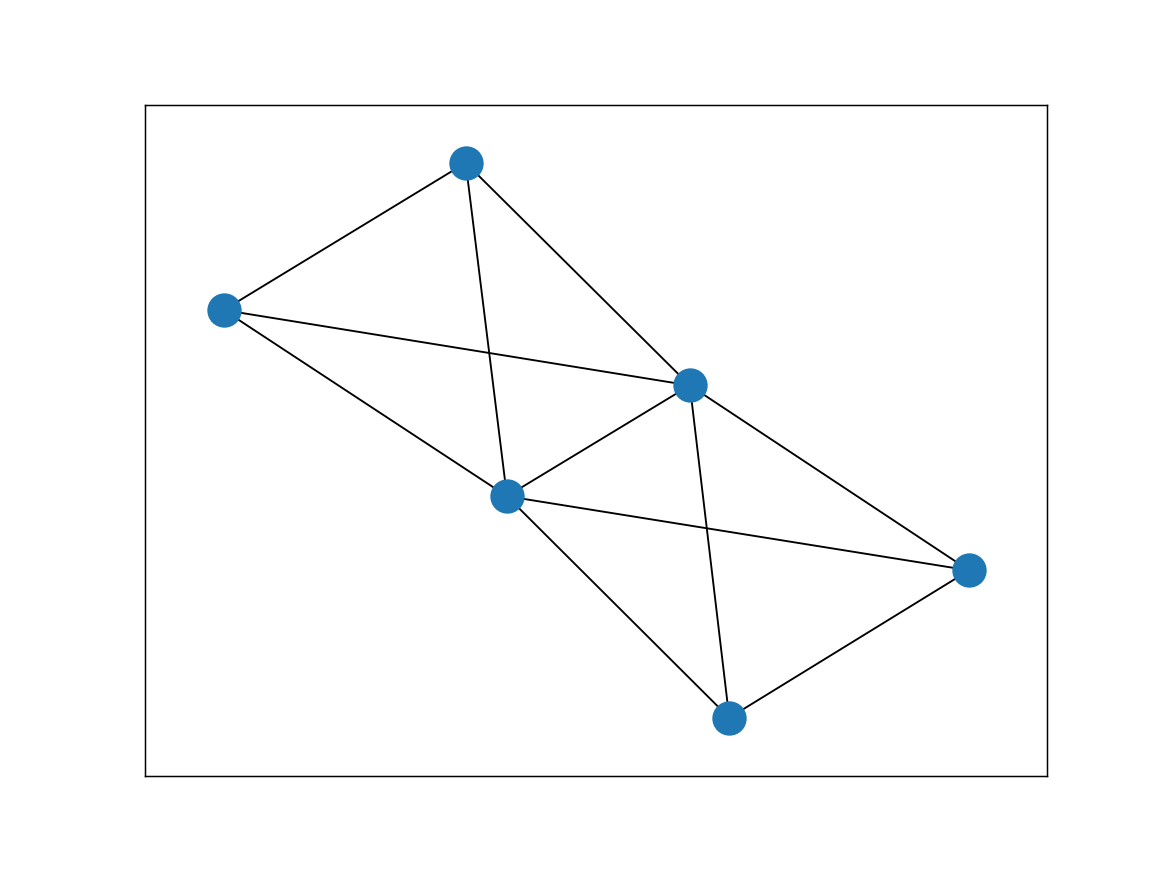

In [4]:
%matplotlib notebook

print(MyGraph.get_edges())
plot_graph.plot_graph(MyGraph)
# plot_graph.test_run_zi()